<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/04_07_%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

In [ ]:
data  =fetch_california_housing()

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

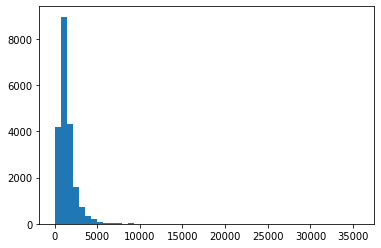

35682.0


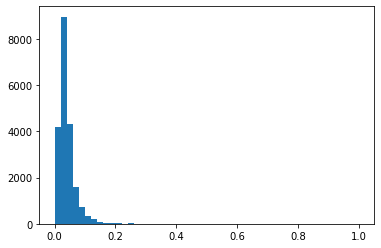

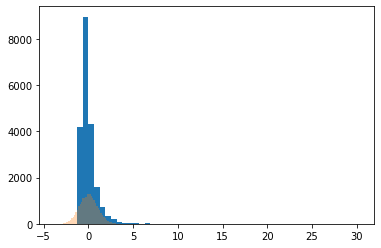

In [ ]:
df = pd.DataFrame(np.c_[data.data, data.target], columns=data.feature_names + ["target"])
LT= df["Latitude"]
Pop = df["Population"]
#Pop[1]=-20000
plt.hist(Pop,bins=50)
plt.show()
print(Pop.max())
P_MinMaxScaler = MinMaxScaler().fit_transform(Pop.values.reshape(-1,1))
plt.hist(P_MinMaxScaler,bins=50)
plt.show()
X_StandardScaler = StandardScaler().fit_transform(Pop.values.reshape(-1,1))
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

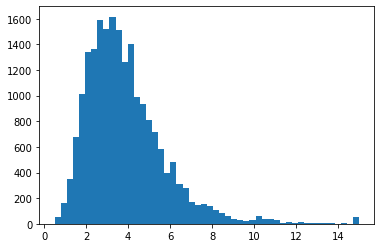

3.8706710029070246


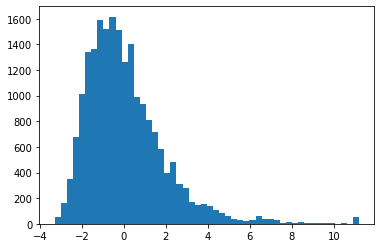

In [ ]:
df_mi = df["MedInc"]
plt.hist(df_mi,bins=50)#収入の平均値
plt.show()
print(df_mi.describe()["mean"])
#print(df_mi)
#print(df_mi-3.8)
plt.hist(df_mi-3.8,bins=50)
plt.show()

In [ ]:
Xorg=df_mi.values.reshape(-1,1)
X= (df_mi-df_mi.describe()["mean"]).values.reshape(-1,1)

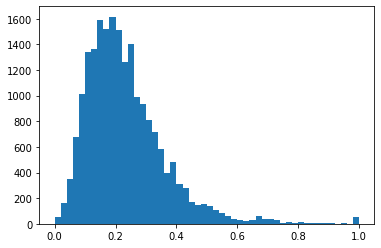

In [ ]:
X_MinMaxScaler = MinMaxScaler().fit_transform(X)
plt.hist(X_MinMaxScaler,bins=50)
plt.show()

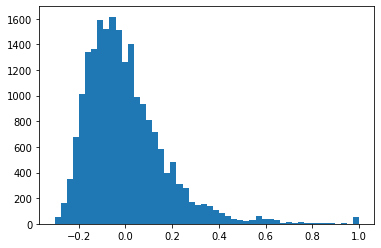

In [ ]:
X_MaxAbsScaler = MaxAbsScaler().fit_transform(X)
plt.hist(X_MaxAbsScaler,bins=50)
plt.show()

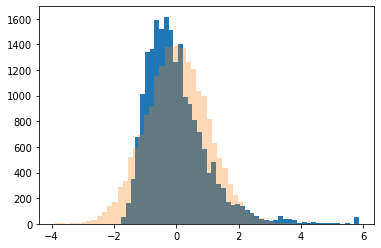

In [ ]:
X_StandardScaler = StandardScaler().fit_transform(Xorg)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

(array([  50.,  163.,  347.,  675., 1012., 1341., 1363., 1592., 1524.,
        1616., 1513., 1259., 1401.,  990.,  935.,  812.,  715.,  582.,
         398.,  483.,  310.,  280.,  168.,  147.,  156.,  136.,  109.,
          86.,   60.,   36.,   28.,   23.,   33.,   58.,   36.,   35.,
          27.,   10.,   14.,    7.,   12.,   10.,    7.,    8.,   10.,
           4.,    2.,    3.,    2.,   52.]),
 array([-1.39225176, -1.25921325, -1.12617474, -0.99313622, -0.86009771,
        -0.7270592 , -0.59402069, -0.46098218, -0.32794367, -0.19490515,
        -0.06186664,  0.07117187,  0.20421038,  0.33724889,  0.47028741,
         0.60332592,  0.73636443,  0.86940294,  1.00244145,  1.13547996,
         1.26851848,  1.40155699,  1.5345955 ,  1.66763401,  1.80067252,
         1.93371104,  2.06674955,  2.19978806,  2.33282657,  2.46586508,
         2.59890359,  2.73194211,  2.86498062,  2.99801913,  3.13105764,
         3.26409615,  3.39713467,  3.53017318,  3.66321169,  3.7962502 ,
         3.92928

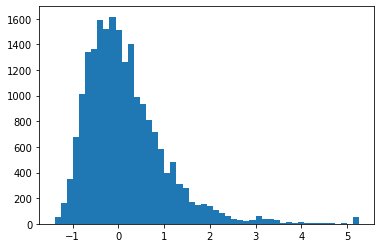

In [ ]:

X_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
plt.hist(X_RobustScaler,bins=50)

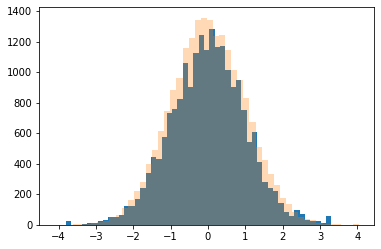

In [ ]:
X_PowerTransformer_boxcox = PowerTransformer(method='box-cox').fit_transform(Xorg)
x = np.random.normal(0,1,len(X_PowerTransformer_boxcox))
plt.hist(X_PowerTransformer_boxcox,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

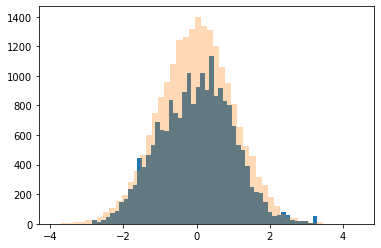

In [ ]:
X_PowerTransformer_yeojohnson = PowerTransformer(method='yeo-johnson').fit_transform(X)
x = np.random.normal(0,1,len(X_PowerTransformer_yeojohnson))
plt.hist(X_PowerTransformer_yeojohnson,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

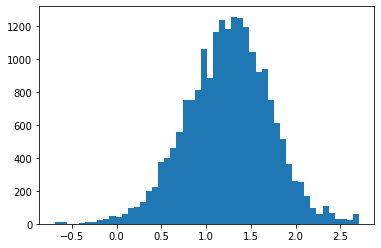

In [ ]:
X_log=np.log(Xorg)
plt.hist(X_log,bins=50)
plt.show()

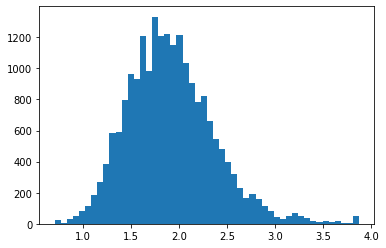

In [ ]:
X_sqrt=np.sqrt(Xorg)
plt.hist(X_sqrt,bins=50)
plt.show()

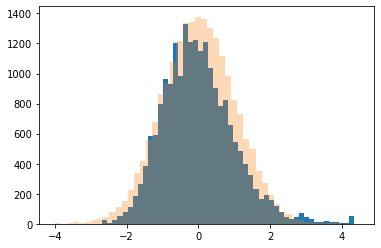

In [ ]:
X_StandardScaler = StandardScaler().fit_transform(X_sqrt)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

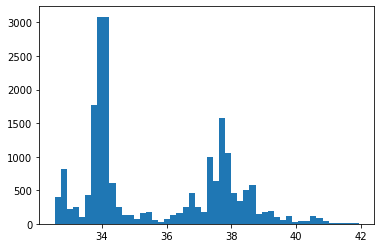

In [ ]:
Xlt = df["Latitude"].values.reshape(-1,1)
plt.hist(Xlt,bins=50)
plt.show()

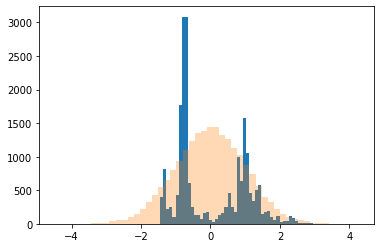

In [ ]:
X_StandardScaler = StandardScaler().fit_transform(Xlt)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()